Importing libraries

In [ ]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [71]:
cwd=os.getcwd()
files_train=0
files_val=0
folder='sample_data/train_data/train'

for sub_folder in os.listdir(folder):
  if sub_folder != '.ipynb_checkpoints':
    path, dir, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_train += len(files)
folder='sample_data/train_data/test'

for sub_folder in os.listdir(folder):
  if sub_folder != '.ipynb_checkpoints':
    path, dir, files = next(os.walk(os.path.join(folder,sub_folder)))
    files_val += len(files)
print(files_train)
print(files_val)

432
164


In [72]:
img_width,img_height=48,48
train_data_dir='sample_data/train_data/train'
validation_data_dir='sample_data/train_data/test'
nb_train_samples=files_train
nb_validation_samples=files_val
batch_size=32
epochs=15
nb_classes=2

In [73]:
model=applications.VGG16(weights='imagenet',include_top=False,input_shape=(img_width,img_height,3))


In [ ]:
model.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [74]:
for layer in model.layers[:10]:
    layer.trainable=False

In [75]:
x=model.output
x=Flatten()(x)
predictions=Dense(nb_classes,activation='softmax')(x)
model_final = Model(inputs=model.input,outputs=predictions)

model_final.compile(loss='categorical_crossentropy'
 ,optimizer=optimizers.SGD(learning_rate=0.0001,momentum=0.9),metrics=['accuracy'])

In [77]:
train_datagen =ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,fill_mode='nearest',
                   zoom_range=0.1, height_shift_range=0.1, width_shift_range=0.1,
                   rotation_range=5)
test_datagen =ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),
                                                    batch_size=batch_size,class_mode='categorical',classes=['empty', 'occupied'])
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_height,img_width),
                                 batch_size=batch_size,class_mode='categorical', classes=['empty', 'occupied'])

Found 766 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [78]:
train_generator.class_indices

{'empty': 0, 'occupied': 1}

In [79]:
history=model_final.fit(train_generator,steps_per_epoch=nb_train_samples//batch_size,
                validation_steps=nb_validation_samples//batch_size,
                epochs=epochs,validation_data=validation_generator)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.8804 - loss: 0.3271 - val_accuracy: 0.7688 - val_loss: 0.5221
Epoch 2/15
11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8968 - loss: 0.2693

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8934 - loss: 0.2714 - val_accuracy: 0.7500 - val_loss: 0.4360
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.8914 - loss: 0.2286 - val_accuracy: 0.8062 - val_loss: 0.3650
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9192 - loss: 0.2036 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9692 - loss: 0.1337 - val_accuracy: 0.8875 - val_loss: 0.3004
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9726 - loss: 0.1408 - val_accuracy: 0.7500 - val_loss: 0.4831
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9570 - loss: 0.1145 - val_accuracy: 0.8938 - val_loss: 0.2695
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9787 - loss: 0.0877 - val_accuracy: 0.7500 - val_loss: 0.2058
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9819 - loss: 0.0694 - val_accuracy: 0.8938 - val_loss: 0

In [80]:
test_loss, test_accuracy = model_final.evaluate(validation_generator, steps=nb_validation_samples // batch_size)
print('Test accuracy:', test_accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9256 - loss: 0.2002
Test accuracy: 0.918749988079071


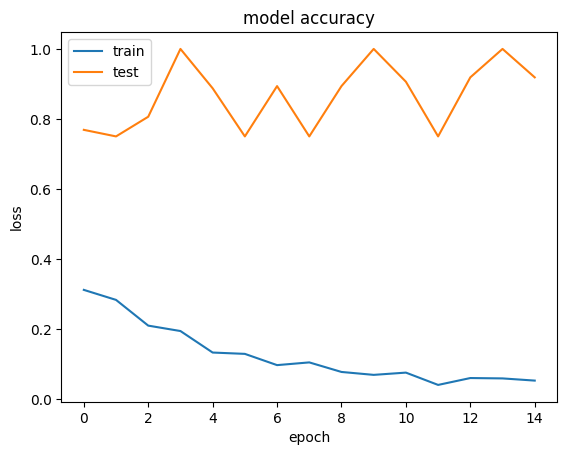

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
model_final.save('model_final.h5')

In [91]:
class_dictionary={}
class_dictionary[0]='no_car'
class_dictionary[1]='car'

In [85]:
class_dictionary

{0: 'no car', 1: 'car'}

In [92]:
import cv2

def makepredictions(image):
    image=cv2.imread(image)
    image=cv2.resize(image,(48,48))
    img = image/255
# (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)

    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label


In [99]:
makepredictions("sample_data/nocar.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'no_car'

In [101]:
model_final.save('model_final.h5')